In [8]:
# locomotion
_version__=1.05 # fixing the averaging, AAC
__version__=1.06 # fixed variable initial TTL-triggered datapoints removal, zeroing time
__version__ # CSD added CSD analysis
__version__=1.07 # file output is now into the report directory
__version__=1.08 # batch analysis, one figure summary output
__version__=1.0801 #troubleshooting misalignment during averaging, single channel from d2_array seems fine.
__version__=1.0802 # creating summaries for all three columns of the 64ch shank
__version__=1.09 # 07/27/15 Sorting order of file_list is fixed, CSD working properly. everything is working
__version__=1.0901 # 07/29/15 true CSD
__version__=1.12 # 03/15/16 - added spectrogram, frequency analysis
__version__=1.13 # 04/08/16 - use seaborn for formatting for publication (larger fonts, despined)
__version__=1.14 # 07/29/16 - trying to remove trials with mouse movement from the final averaged LFP using 1500 uV threshold



initial_gap=7168 # this is now recalculated later in the code, as this is variable from trial-to-trial

probe='64DA'

if probe=='64DA':
    
     # 64D probe mapping, channels face me
        probe_map={47:0.00, 63:1.00, 17:2.00,
               46:0.01, 0:1.01, 18:2.01,
               45:0.02, 62:1.02, 19:2.02,
               44:0.03, 1:1.03, 20:2.03,
               43:0.04, 61:1.04, 21:2.04,
               42:0.05, 2:1.05, 22:2.05,
               41:0.06, 60:1.06, 23:2.06,
               40:0.07, 3:1.07, 24:2.07,
               39:0.08, 59:1.08, 25:2.08,
               38:0.09, 4:1.09, 26:2.09,
               37:0.10, 58:1.10, 27:2.10,
               36:0.11, 5:1.11, 28:2.11,
               35:0.12, 57:1.12, 29:2.12,
               34:0.13, 6:1.13, 30:2.13,
               33:0.14, 56:1.14, 31:2.14,
               32:0.15, 7:1.15, 16:2.15,
               48:0.16, 55:1.16, 15:2.16,
               49:0.17, 8:1.17, 14:2.17,
               50:0.18, 54:1.18, 13:2.18,
               51:0.19, 9:1.19, 12:2.19,
               52:0.20, 53:1.20, 11:2.20,
                        10:1.21
               }     


elif probe == '64DB':
    # 64D probe mapping, channels face monitor
        probe_map={16:0.00, 0:1.00, 46:2.00,
               17:0.01, 63:1.01, 45:2.01,
               18:0.02, 1:1.02, 44:2.02,
               19:0.03, 62:1.03, 43:2.03,
               20:0.04, 2:1.04, 42:2.04,
               21:0.05, 61:1.05, 41:2.05,
               22:0.06, 3:1.06, 40:2.06,
               23:0.07, 60:1.07, 39:2.07,
               24:0.08, 4:1.08, 38:2.08,
               25:0.09, 59:1.09, 37:2.09,
               26:0.10, 5:1.10, 36:2.10,
               27:0.11, 58:1.11, 35:2.11,
               28:0.12, 6:1.12, 34:2.12,
               29:0.13, 57:1.13, 33:2.13,
               30:0.14, 7:1.14, 32:2.14,
               31:0.15, 56:1.15, 47:2.15,
               15:0.16, 8:1.16, 48:2.16,
               14:0.17, 55:1.17, 49:2.17,
               13:0.18, 9:1.18, 50:2.18,
               12:0.19, 54:1.19, 51:2.19,
               11:0.20, 10:1.20, 52:2.20,
                        53:1.21
               }
        
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']  


# pal=sns.blend_palette(["black", "crimson"], 2)
sns.despine()
# current_palette = sns.color_palette("colorblind", 10)
# sns.set_palette(current_palette)

# for publication quality plots, not bar graphs, use this: 
def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()

%load_ext autoreload
%autoreload 2

import scipy.signal as sg
sns.set_context("poster")
sns.set_style("ticks")
from collections import Counter
import Python3_OpenEphys_V14 as OE
import pandas as pd
from pandas import DataFrame
import numpy as np
import glob
import os
import re
import sys
import fnmatch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

In [28]:
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056'
                     ,'ET#063','ET#064','ET#065','ET#066','ET#067'
                     ,'ET#068','ET#069','ET#031_r'
                    ],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061'
                     ,'ET#070','ET#071','ET#072','ET#073','ET#074'],
              }

In [47]:
report_dir=r'U:\Data\tang232\V1+LM\report\dur200bpn/'
veldf=pd.read_pickle(report_dir+'velocity_06.24.2023.pkl')
veldf

,et,exprt,cm/s,trial,loco,sf,tf,session
0,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 2.5, 2.5, 0.0, 0.0, 0.0, ...",0,0,0.120,0.75,1
1,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0.120,0.75,1
2,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,0.120,0.75,1
3,ET#065_right_post,BPnoise trained 20t,"[5.0, 2.5, 0.0, 0.0, -2.5, -2.5, 0.0, 2.5, 2.5...",3,0,0.120,0.75,1
4,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0,0.120,0.75,1
...,...,...,...,...,...,...,...,...
25505,ET#020_right_pre,BPnoise 10t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",245,0,0.015,0.75,2
25506,ET#020_right_pre,BPnoise 10t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",246,0,0.015,0.75,2
25507,ET#020_right_pre,BPnoise 10t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",247,0,0.015,6.00,2
25508,ET#020_right_pre,BPnoise 10t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 2.5, ...",248,0,0.060,1.50,2


In [48]:
veldf1=veldf[(veldf.et.str.contains('|'.join(training_stim['LM']
                                     +training_stim['AL']+['pre']
                                     )))
      &(veldf.sf.isin([0.12,0.03]))
      &(veldf.tf.isin([0.75,6]))
     ].groupby(['et','sf','tf']
      ).filter(lambda x:x.exprt.nunique()>1)
veldf1=veldf1[~veldf1.exprt.str.contains('10t')]

veldf2=veldf[(veldf.et.str.contains('|'.join(training_stim['LM']
                                     +training_stim['AL']+['pre']
                                     )))
      &(veldf.sf.isin([0.12,0.03]))
      &(veldf.tf.isin([0.75,6]))
     ].groupby(['et','sf','tf']
      ).filter(lambda x:x.exprt.nunique()==1)

veldf3=pd.concat([veldf1,veldf2])
veldf3.head()
# veldf3.groupby(['et','sf','tf']).filter(lambda x:x.exprt.nunique()>1)

,et,exprt,cm/s,trial,loco,sf,tf,session
0,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 2.5, 2.5, 0.0, 0.0, 0.0, ...",0,0,0.12,0.75,1
1,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0.12,0.75,1
2,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,0.12,0.75,1
3,ET#065_right_post,BPnoise trained 20t,"[5.0, 2.5, 0.0, 0.0, -2.5, -2.5, 0.0, 2.5, 2.5...",3,0,0.12,0.75,1
4,ET#065_right_post,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0,0.12,0.75,1


In [49]:
veldf3['trial']=veldf3.session.astype(str)+'-'+veldf3.trial.astype(str)

In [50]:
import itertools
toplot=veldf3[(~veldf3.et.str.contains('|'.join(training_stim['AL'])))
             &(veldf3.sf==0.12)
              &(veldf3.tf==0.75)
             ]
toplot['pre_post']=toplot.et.apply(lambda x:x.split('_')[-1])
pretoplot=toplot[toplot.et.str.contains('')
                ]#.groupby(['et']).trial.nunique()
pretoplot=pretoplot.groupby(['et','exprt','pre_post','sf','tf','loco']
                 ).apply(lambda x:
         np.column_stack((itertools.zip_longest(*x['cm/s'].values
                        , fillvalue=np.nan)))).to_frame('cm/s').reset_index()
pretoplot['cm/s']=pretoplot['cm/s'].apply(lambda x:
                                          np.nanmean(x,axis=0))

pretoplot['times']=pretoplot['cm/s'].apply(lambda x:np.arange(len(x))/40)
pretoplot=pretoplot.set_index(['et','exprt','pre_post','sf','tf','loco']
                             ).apply(pd.Series.explode).reset_index()
pretoplot.head()

C:\Users\tangy\AppData\Local\Temp\ipykernel_26144\1961922808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toplot['pre_post']=toplot.et.apply(lambda x:x.split('_')[-1])
C:\Users\tangy\AppData\Local\Temp\ipykernel_26144\1961922808.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.column_stack((itertools.zip_longest(*x['cm/s'].values


,et,exprt,pre_post,sf,tf,loco,cm/s,times
0,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,-0.25,0.0
1,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,-0.25,0.025
2,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,0.0,0.05
3,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,0.0,0.075
4,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,-0.25,0.1


In [51]:
pretoplot['absspd']=pretoplot['cm/s'].abs()
pretoplot.head()

,et,exprt,pre_post,sf,tf,loco,cm/s,times,absspd
0,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,-0.25,0.0,0.25
1,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,-0.25,0.025,0.25
2,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,0.0,0.05,0.0
3,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,0.0,0.075,0.0
4,ET#012_left_pre,BPnoise 10t,pre,0.12,0.75,0,-0.25,0.1,0.25


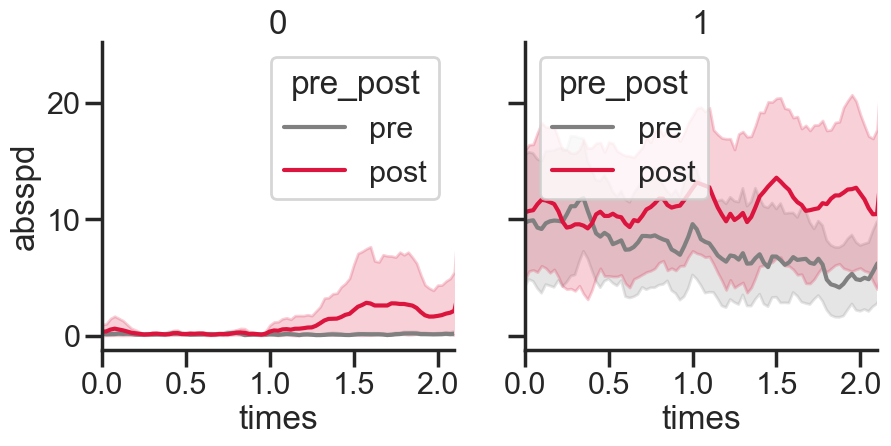

In [52]:
f,ax=plt.subplots(1,2,figsize=(10,4),sharey=True)
# for i,pp in enumerate(['pre','post']):
#     sns.lineplot(data=pretoplot[pretoplot.pre_post==pp]
#                  ,x='times',y='cm/s'
#                  ,hue='loco'
#                  ,ax=ax[i]
#                 )
#     ax[i].set_xticks(np.arange(0,2.1,0.5))
#     ax[i].set_xlim(0,2.1)
#     ax[i].set_title(pp)
for i,pp in enumerate([0,1]):
    sns.lineplot(data=pretoplot[pretoplot.loco==pp]
                 ,x='times'
#                  ,y='cm/s'
                 ,y='absspd'
                 ,hue='pre_post'
                 ,ax=ax[i]
                )
    ax[i].set_xticks(np.arange(0,2.1,0.5))
    ax[i].set_xlim(0,2.1)
    ax[i].set_title(pp)
sns.despine()
# plt.savefig(r'F:\V1+LM\report\dur200bpn\locomotion'+'/LMtraining_absspd_v2.png',bbox_inches='tight')
# plt.savefig(r'F:\V1+LM\report\dur200bpn\locomotion'+'/LMtraining_absspd_v2.pdf',bbox_inches='tight')

In [40]:
spdtoplot=pretoplot.groupby(['et','pre_post','sf','tf','loco']
                 ).apply(lambda x:x[x.times.between(0.5,1.0)]['absspd'].mean()
                        ).to_frame('absspd').reset_index()
spdtoplot.head()

,et,pre_post,sf,tf,loco,absspd
0,ET#012_left_pre,pre,0.12,0.75,0,0.208333
1,ET#013_left_pre,pre,0.12,0.75,0,0.012531
2,ET#013_left_pre,pre,0.12,0.75,1,9.166667
3,ET#014_left_pre,pre,0.12,0.75,0,0.130952
4,ET#016_left_pre,pre,0.12,0.75,0,0.428571


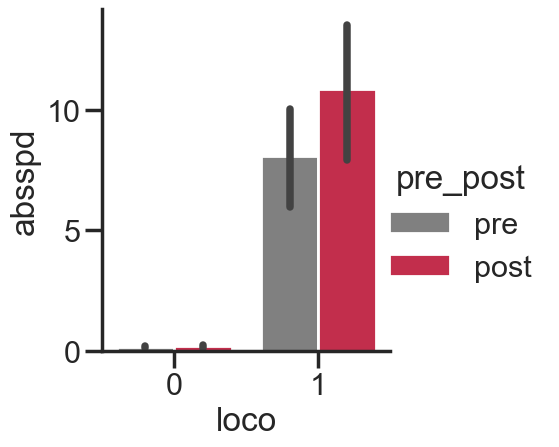

In [41]:
sns.catplot(data=spdtoplot.reset_index()
            ,x='loco',y='absspd',hue='pre_post'
           ,kind='bar',ci=68
           )
# plt.ylim(-1,20)
# plt.savefig(r'F:\V1+LM\report\dur200bpn\locomotion'+'/LMtraining_meanspd_v2.png',bbox_inches='tight')
# plt.savefig(r'F:\V1+LM\report\dur200bpn\locomotion'+'/LMtraining_meanspd_v2.pdf',bbox_inches='tight')

In [42]:
perctoplot=toplot.groupby(['et','pre_post','sf','tf','loco']
                         ).trial.nunique().to_frame('count')
perctoplot=perctoplot.groupby(['et','pre_post','sf','tf']
                 ).apply(lambda x:x/x.sum())
perctoplot.head()

count
et              pre_post sf   tf   loco          
ET#012_left_pre pre      0.12 0.75 0     1.000000
ET#013_left_pre pre      0.12 0.75 0     0.950000
                                   1     0.050000
ET#014_left_pre pre      0.12 0.75 0     1.000000
ET#016_left_pre pre      0.12 0.75 0     0.833333

In [43]:
import pingouin as pg
norm=perctoplot.groupby(['loco','pre_post'])['count'].apply(pg.normality)
description=perctoplot.groupby(['loco','pre_post','tf','sf'])['count'].describe()
anova=pg.anova(data=perctoplot.reset_index(),dv='count',between=['loco','pre_post'])
mptest=pg.pairwise_ttests(data=perctoplot.reset_index()
                         ,dv='count',between=['loco','pre_post']
                        ,padjust='fdr_bh',parametric=False
                        )
mptest
description

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


count      mean       std    min    25%   50%  \
loco pre_post tf   sf                                                    
0    post     0.75 0.12   17.0  0.785294  0.298572  0.075  0.700  0.95   
     pre      0.75 0.12   24.0  0.932639  0.106603  0.550  0.900  1.00   
1    post     0.75 0.12   13.0  0.280769  0.314271  0.025  0.025  0.20   
     pre      0.75 0.12   11.0  0.146970  0.115185  0.050  0.075  0.10   

                              75%    max  
loco pre_post tf   sf                     
0    post     0.75 0.12  0.975000  1.000  
     pre      0.75 0.12  1.000000  1.000  
1    post     0.75 0.12  0.400000  0.925  
     pre      0.75 0.12  0.183333  0.450

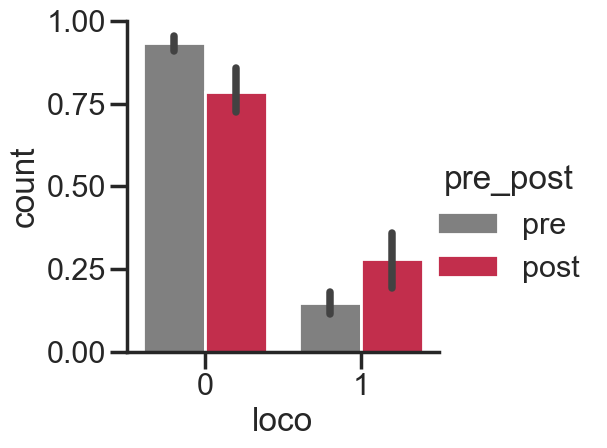

In [44]:
sns.catplot(data=perctoplot.reset_index()
            ,x='loco',y='count',hue='pre_post'
           ,kind='bar',ci=68
           )
# plt.savefig(r'F:\V1+LM\report\dur200bpn\locomotion'+'/ALtraining_trialfrac_v2.png',bbox_inches='tight')
# plt.savefig(r'F:\V1+LM\report\dur200bpn\locomotion'+'/ALtraining_trialfrac_v2.pdf',bbox_inches='tight')

In [45]:
# perctoplot

In [46]:
import pingouin as pg
norm=perctoplot.groupby(['loco','pre_post'])['count'].apply(pg.normality)
description=perctoplot.groupby(['loco','pre_post'])['count'].describe()
anova=pg.anova(data=perctoplot.reset_index(),dv='count',between=['loco','pre_post'])
mptest=pg.pairwise_ttests(data=perctoplot.reset_index()
                         ,dv='count',between=['loco','pre_post']
                        ,padjust='fdr_bh',parametric=False
                        )
description

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


count      mean       std    min    25%   50%       75%    max
loco pre_post                                                                
0    post       17.0  0.785294  0.298572  0.075  0.700  0.95  0.975000  1.000
     pre        24.0  0.932639  0.106603  0.550  0.900  1.00  1.000000  1.000
1    post       13.0  0.280769  0.314271  0.025  0.025  0.20  0.400000  0.925
     pre        11.0  0.146970  0.115185  0.050  0.075  0.10  0.183333  0.450